# Loading Xetra Data

In [35]:
import pandas as pd
import glob
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(color_codes=True)

Load all files from a given date

In [23]:
def load_csv_dir(data_dir):
    return pd.concat(map(pd.read_csv, glob.glob(data_dir)))

In [20]:
date = '2020-08-21'
data_dir = f'../data/deutsche-boerse-xetra-pds/{date}/*'

In [37]:
df = load_csv_dir(data_dir)
df.head()

,ISIN,Mnemonic,SecurityDesc,SecurityType,Currency,SecurityID,Date,Time,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades
0,AT0000A0E9W5,SANT,S+T AG (Z.REG.MK.Z.)O.N.,Common stock,EUR,2504159,2020-08-21,07:00,24.20,24.20,24.20,24.20,112,1
1,DE000A0DJ6J9,S92,SMA SOLAR TECHNOL.AG,Common stock,EUR,2504287,2020-08-21,07:00,35.50,35.80,35.50,35.80,815,2
2,DE000A0D6554,NDX1,NORDEX SE O.N.,Common stock,EUR,2504290,2020-08-21,07:00,10.45,10.45,10.44,10.44,6074,7
3,DE000A0D9PT0,MTX,MTU AERO ENGINES NA O.N.,Common stock,EUR,2504297,2020-08-21,07:00,147.95,148.00,147.30,147.30,907,7
4,DE000A0HN5C6,DWNI,DEUTSCHE WOHNEN SE INH,Common stock,EUR,2504314,2020-08-21,07:00,44.50,44.50,44.43,44.43,2721,4


In [22]:
df.shape

(78376, 14)

### Date Range

In [28]:
def read_date_range(start_date: str, end_date: str=None, mnemonic: str=None):
    if end_date is None:
        end_date = str(datetime.date.today())
    list_of_dirs = glob.glob('../data/deutsche-boerse-xetra-pds/*/')
    range_dirs = []
    for x in list_of_dirs:
        if (x.split('/')[-2] > start_date) and (x.split('/')[-2] < end_date):
            range_dirs.append(x)
    range_dirs.sort()
    df = load_csv_dir(range_dirs[0]+"*")
    if mnemonic:
        df = df[df['Mnemonic']==mnemonic]
    for dir_ in range_dirs[1:]:
        temp_df = load_csv_dir(dir_+"*")
        if mnemonic:
            temp_df = temp_df[temp_df['Mnemonic']==mnemonic]
        df = pd.concat([df, temp_df])
    return df

In [31]:
df = read_date_range('2020-08-01', '2020-08-15', 'BMW')
df.head()

,ISIN,Mnemonic,SecurityDesc,SecurityType,Currency,SecurityID,Date,Time,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades
39,DE0005190003,BMW,BAY.MOTOREN WERKE AG ST,Common stock,EUR,2504900,2020-08-03,10:00,55.14,55.14,55.09,55.09,2985,15
192,DE0005190003,BMW,BAY.MOTOREN WERKE AG ST,Common stock,EUR,2504900,2020-08-03,10:01,55.10,55.11,55.10,55.11,989,8
337,DE0005190003,BMW,BAY.MOTOREN WERKE AG ST,Common stock,EUR,2504900,2020-08-03,10:02,55.11,55.13,55.10,55.13,1120,15
478,DE0005190003,BMW,BAY.MOTOREN WERKE AG ST,Common stock,EUR,2504900,2020-08-03,10:03,55.12,55.12,55.11,55.12,587,5
617,DE0005190003,BMW,BAY.MOTOREN WERKE AG ST,Common stock,EUR,2504900,2020-08-03,10:04,55.13,55.13,55.10,55.11,627,6


In [32]:
df.shape

(5027, 14)

In [27]:
import sys
sys.getsizeof(df) # 1Gb

1050259858

There is [some documentation available](https://github.com/Deutsche-Boerse/dbg-pds/blob/master/docs/data_dictionary.md) on the columns of the dataframe. I reproduce it here for convenience. 

### XETRA

The XETRA dataset contains trade data relating to stock market trades dating from Jun-26-2016 onwards. Each row represents an aggregate of one-minute of trade activity for each security, following the Open/High/Low/Close (OHLC) format, with the number of trades and traded contracts also provided.

The dataset contains the following fields:

| Column Name | Data Description | Data Dictionary |
|-------------|------------------|-----------------|
|ISIN|ISIN of the security|string|
|Mnemonic|Stock exchange ticker symbol |string|
|SecurityDesc|Description of the security|string|
|SecurityType|Type of security|string|
|Currency|Currency in which the product is traded|ISO 4217 string (see https://en.wikipedia.org/wiki/ISO_4217)|
|SecurityID|Unique identifier for each contract|int|
|Date |Date of trading period |date |
|Time|Minute of trading to which this entry relates|time (hh:mm)|
|StartPrice|Trading price at the start of period|float|
|MaxPrice|Maximum price over the period|float|
|MinPrice|Minimum price over the period|float|
|EndPrice|Trading price at the end of the period|float|
|TradedVolume|Total value traded|float|
|NumberOfTrades|Number of distinct trades during the period|int|

## Exploration

Common values for a given stock are: 

    i. ISIN 
    ii. Mnemonic 
    iii. SecurityDesc 
    iv. Currency 
    v. SecurityID 

In [23]:
stock_specific_cols = ['ISIN', 'Mnemonic', 'SecurityDesc', 'Currency', 'SecurityID']

In [24]:
unique_stocks = df[stock_specific_cols].groupby('ISIN', as_index=False).first()
unique_stocks.head()

,ISIN,Mnemonic,SecurityDesc,Currency,SecurityID
0,AT00000FACC2,1FC,FACC AG INH.AKT.,EUR,2504163
1,AT0000606306,RAW,RAIFFEISEN BK INTL INH.,EUR,2504165
2,AT0000609607,ABS2,PORR AG,EUR,2504166
3,AT0000644505,LEN,LENZING AG,EUR,2504168
4,AT0000652011,EBO,ERSTE GROUP BNK INH. O.N.,EUR,2504169


In [25]:
unique_stocks.shape

(2704, 5)

In [26]:
most_traded_stocks = df[stock_specific_cols].groupby(stock_specific_cols[:-1], as_index=False)\
                                            .count()\
                                            .rename(columns={"SecurityID": "count"})\
                                            .sort_values("count", ascending=False)
most_traded_stocks.head(10)

,ISIN,Mnemonic,SecurityDesc,Currency,count
255,DE0007100000,DAI,DAIMLER AG NA O.N.,EUR,507
92,DE0005190003,BMW,BAY.MOTOREN WERKE AG ST,EUR,507
256,DE0007164600,SAP,SAP SE O.N.,EUR,504
289,DE0007664039,VOW3,VOLKSWAGEN AG VZO O.N.,EUR,504
677,DE000BASF111,BAS,BASF SE NA O.N.,EUR,503
209,DE0006231004,IFX,INFINEON TECH.AG NA O.N.,EUR,503
304,DE0008404005,ALV,ALLIANZ SE NA O.N.,EUR,501
252,DE0007037129,RWE,RWE AG INH O.N.,EUR,497
678,DE000BAY0017,BAYN,BAYER AG NA O.N.,EUR,496
82,DE0005140008,DBK,DEUTSCHE BANK AG NA O.N.,EUR,495


In [27]:
pd.set_option('display.max_colwidth', None)

## Inspecting Time Series

In [44]:
df['CalcDateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.drop(columns=['Date', 'Time'], inplace=True)
df.head()

,ISIN,Mnemonic,SecurityDesc,SecurityType,Currency,SecurityID,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades,CalcDateTime
0,AT0000A0E9W5,SANT,S+T AG (Z.REG.MK.Z.)O.N.,Common stock,EUR,2504159,24.20,24.20,24.20,24.20,112,1,2020-08-21 07:00:00
1,DE000A0DJ6J9,S92,SMA SOLAR TECHNOL.AG,Common stock,EUR,2504287,35.50,35.80,35.50,35.80,815,2,2020-08-21 07:00:00
2,DE000A0D6554,NDX1,NORDEX SE O.N.,Common stock,EUR,2504290,10.45,10.45,10.44,10.44,6074,7,2020-08-21 07:00:00
3,DE000A0D9PT0,MTX,MTU AERO ENGINES NA O.N.,Common stock,EUR,2504297,147.95,148.00,147.30,147.30,907,7,2020-08-21 07:00:00
4,DE000A0HN5C6,DWNI,DEUTSCHE WOHNEN SE INH,Common stock,EUR,2504314,44.50,44.50,44.43,44.43,2721,4,2020-08-21 07:00:00


In [30]:
mpl.rcParams['figure.figsize'] = (15, 10) # use bigger graphs
def timeseries_plot(df, mnemonics, metrics, ylabel):
    ax = None
    for mnemonic in mnemonics:
        for metric in metrics:
            selected = df[df.Mnemonic == mnemonic][['CalcDateTime', metric]].copy()
            selected.index = selected['CalcDateTime']
            selected = selected.sort_index()
            del selected['CalcDateTime']
            ax = selected.plot( ax = ax)
            plt.ylabel(ylabel)

### Price

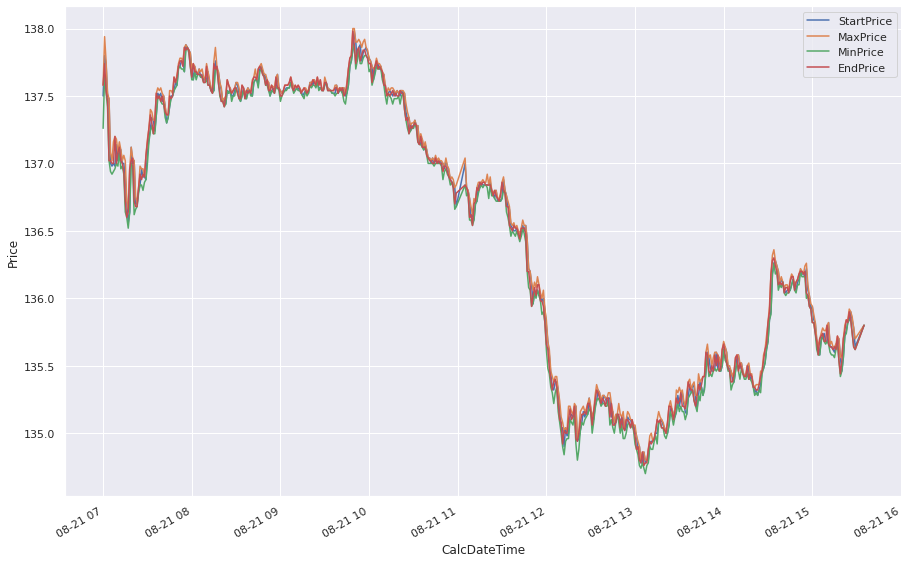

In [32]:
timeseries_plot(df, ['SAP'], ['StartPrice', 'MaxPrice', "MinPrice", 'EndPrice'], 'Price')

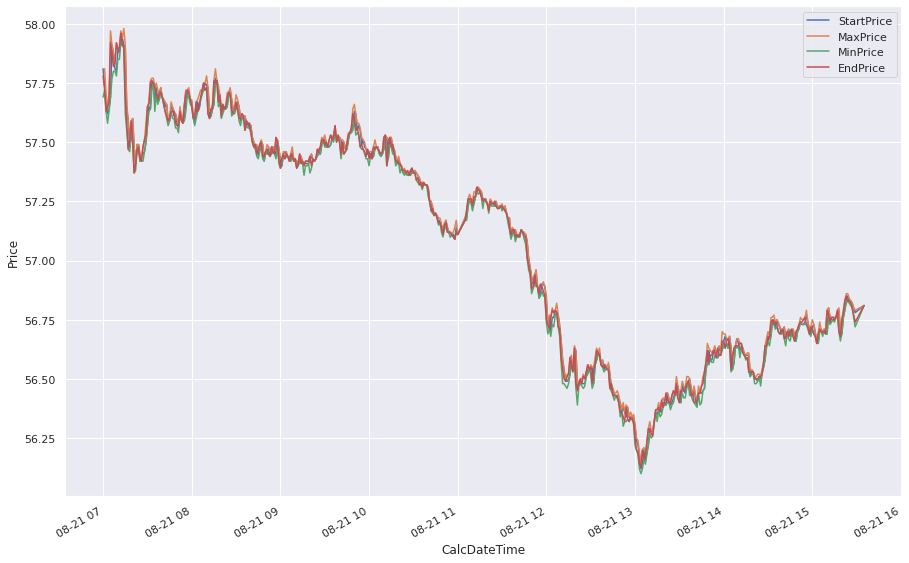

In [33]:
timeseries_plot(df, ['BMW'], ['StartPrice', 'MaxPrice', "MinPrice", 'EndPrice'], 'Price')

### Traded Volume

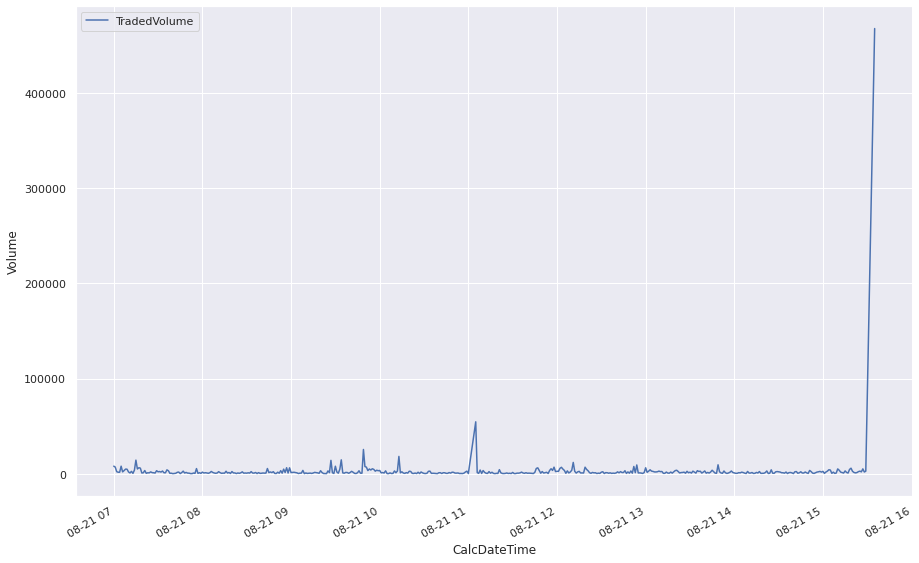

In [34]:
timeseries_plot(df, ['BMW'], ['TradedVolume'], 'Volume')

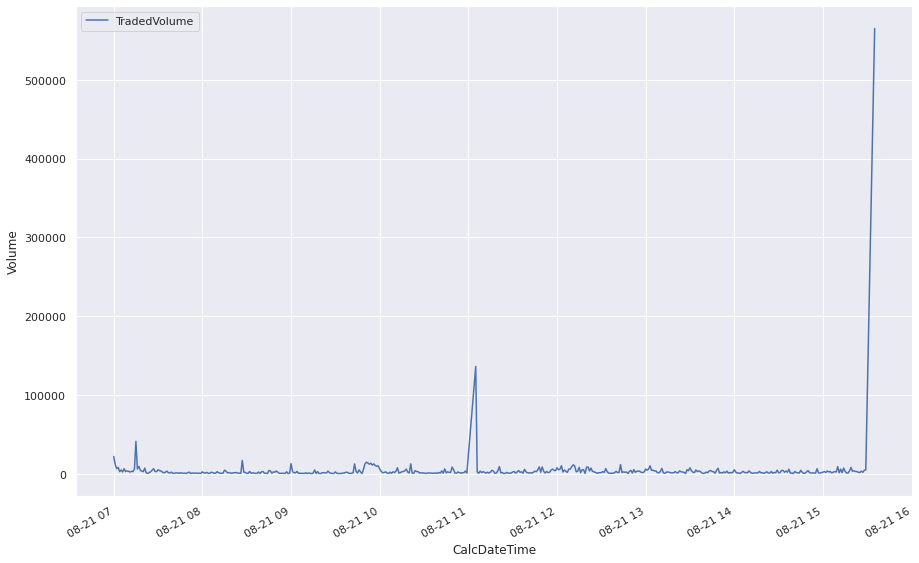

In [35]:
timeseries_plot(df, ['SAP'], ['TradedVolume'], 'Volume')

### Number of Trades

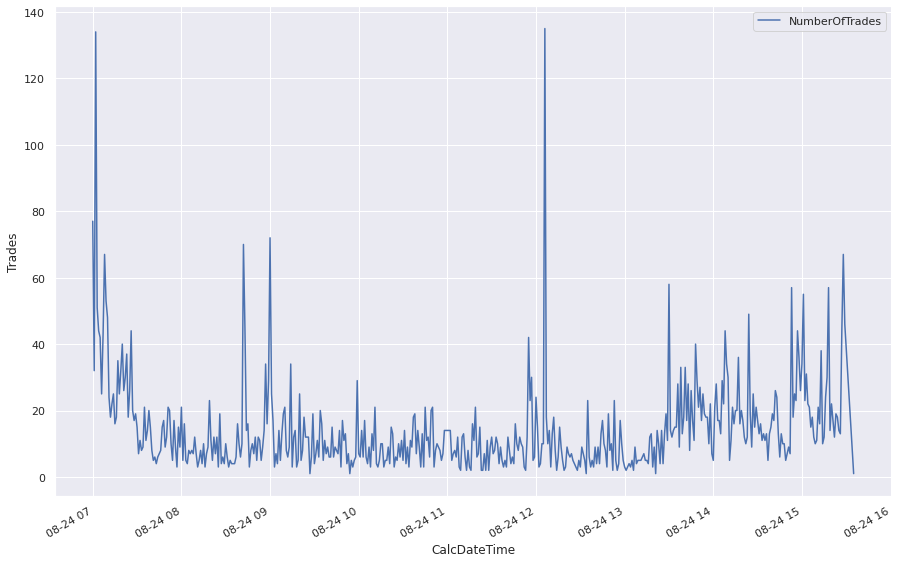

In [128]:
timeseries_plot(df, ['SAP'], ['NumberOfTrades'], 'Trades')

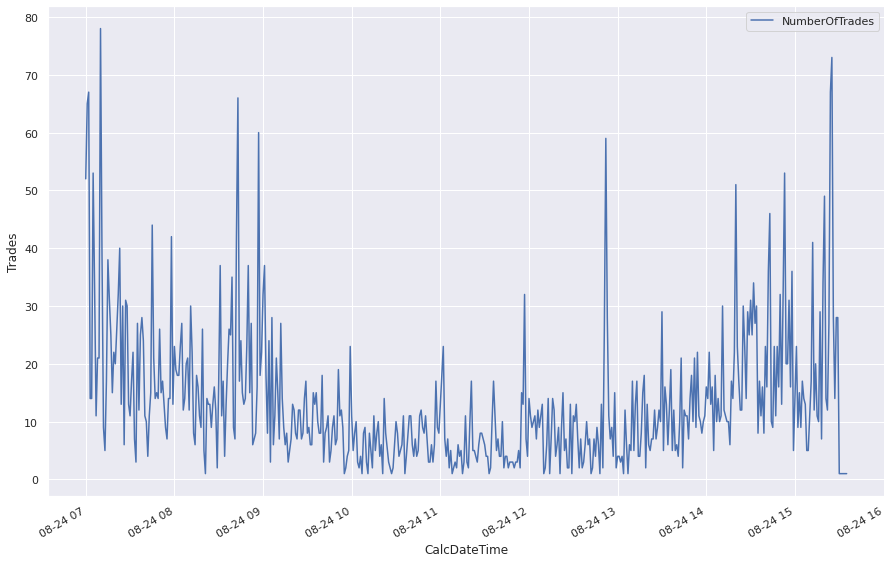

In [129]:
timeseries_plot(df, ['BMW'], ['NumberOfTrades'], 'Trades')

### Average Trade Size

$$\text{Average Trade Size} = \frac{\text{Traded Volume}}{\text{Number of Trades}}$$

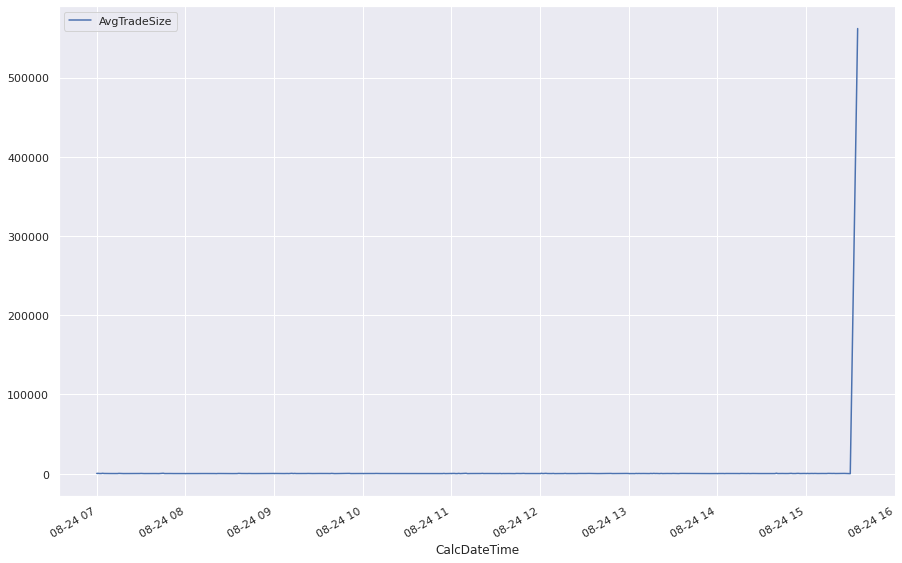

In [19]:
mnemonic = 'BMW'
selected = df[df.Mnemonic == mnemonic].copy()
selected.index = selected['CalcDateTime']
selected = selected.sort_index()
selected['AvgTradeSize'] = selected['TradedVolume'] / (0.1 + selected['NumberOfTrades'])
selected[['AvgTradeSize']].plot()
plt.show()